In [562]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [563]:
kidneyDF = pd.read_csv('data/kidney_disease.csv')
kidneyDF.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


<pre><hr>
컬럼명	설명
age	나이
bp	혈압 (mm Hg)
sg	소변 비중 (Specific Gravity)
al	소변 내 단백질 (Albumin)
su	소변 내 당 (Sugar)
rbc	적혈구 상태 (Normal/Abnormal)
pc	요침사 (Pus Cells, 정상/비정상)
pcc	요침사 균감염 여부 (Pus Cell Clumps)
ba	박테리아 존재 여부 (Bacteria)
bgr	혈당 (Blood Glucose Random)
bu	혈액 요소 (Blood Urea)
sc	혈청 크레아티닌 (Serum Creatinine)
sod	혈청 나트륨 (Sodium)
pot	혈청 칼륨 (Potassium)
hemo	혈색소 (Hemoglobin)
pcv	적혈구 용적율 (Packed Cell Volume)
wc	백혈구 수치 (White Blood Cell Count)
rc	적혈구 수치 (Red Blood Cell Count)
htn	고혈압 여부 (Hypertension)
dm	당뇨병 여부 (Diabetes Mellitus)
cad	관상동맥질환 여부 (Coronary Artery Disease)
appet	식욕 상태 (Good/Poor)
pe	부종 여부 (Pedal Edema)
ane	빈혈 여부 (Anemia)
classification	신장질환 여부 (CKD/Not CKD)
</pre><hr>

In [564]:
# 정보 확인
kidneyDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [565]:
kidneyDF.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [566]:
# 컬럼명 변경
신장DF = kidneyDF.rename(columns={
    "age": "나이",
    "bp": "혈압",
    "sg": "소변 비중",
    "al": "소변 단백질",
    "su": "소변 당",
    "bgr": "혈당",
    "bu": "혈액 요소",
    "sc": "혈청 크레아티닌",
    "sod": "혈청 나트륨",
    "pot": "혈청 칼륨",
    "hemo": "혈색소"
})

In [567]:
신장DF.describe()

,나이,혈압,소변 비중,소변 단백질,소변 당,혈당,혈액 요소,혈청 크레아티닌,혈청 나트륨,혈청 칼륨,혈색소
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [568]:
# 결측치 확인
print(kidneyDF.isnull().sum(0))
kidneyDF.isnull().sum().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


np.int64(1009)

<pre><hr>
연속형 데이터 <= KNNImputer  
['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']  

범주형 데이터 <= mode
['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classfication']

<hr></pre>

[결측치 처리] 10%의 데이터 손실 참을 수 없다

In [569]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [570]:
continuous_cols = ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'] # 14개
category_cols = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']     # 11개

- 연속형 변수

In [571]:
kidneyDF[continuous_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sc      383 non-null    float64
 8   sod     313 non-null    float64
 9   pot     312 non-null    float64
 10  hemo    348 non-null    float64
 11  pcv     330 non-null    object 
 12  wc      295 non-null    object 
 13  rc      270 non-null    object 
dtypes: float64(11), object(3)
memory usage: 43.9+ KB


In [572]:
# 숫자로 변환 (errors='coerce'를 사용하여 변환 불가능한 값은 NaN으로 처리)
kidneyDF['pcv'] = pd.to_numeric(kidneyDF['pcv'], errors='coerce')
kidneyDF['wc'] = pd.to_numeric(kidneyDF['wc'], errors='coerce')
kidneyDF['rc'] = pd.to_numeric(kidneyDF['rc'], errors='coerce')

# 변환 확인
kidneyDF[continuous_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     356 non-null    float64
 6   bu      381 non-null    float64
 7   sc      383 non-null    float64
 8   sod     313 non-null    float64
 9   pot     312 non-null    float64
 10  hemo    348 non-null    float64
 11  pcv     329 non-null    float64
 12  wc      294 non-null    float64
 13  rc      269 non-null    float64
dtypes: float64(14)
memory usage: 43.9 KB


<hr>

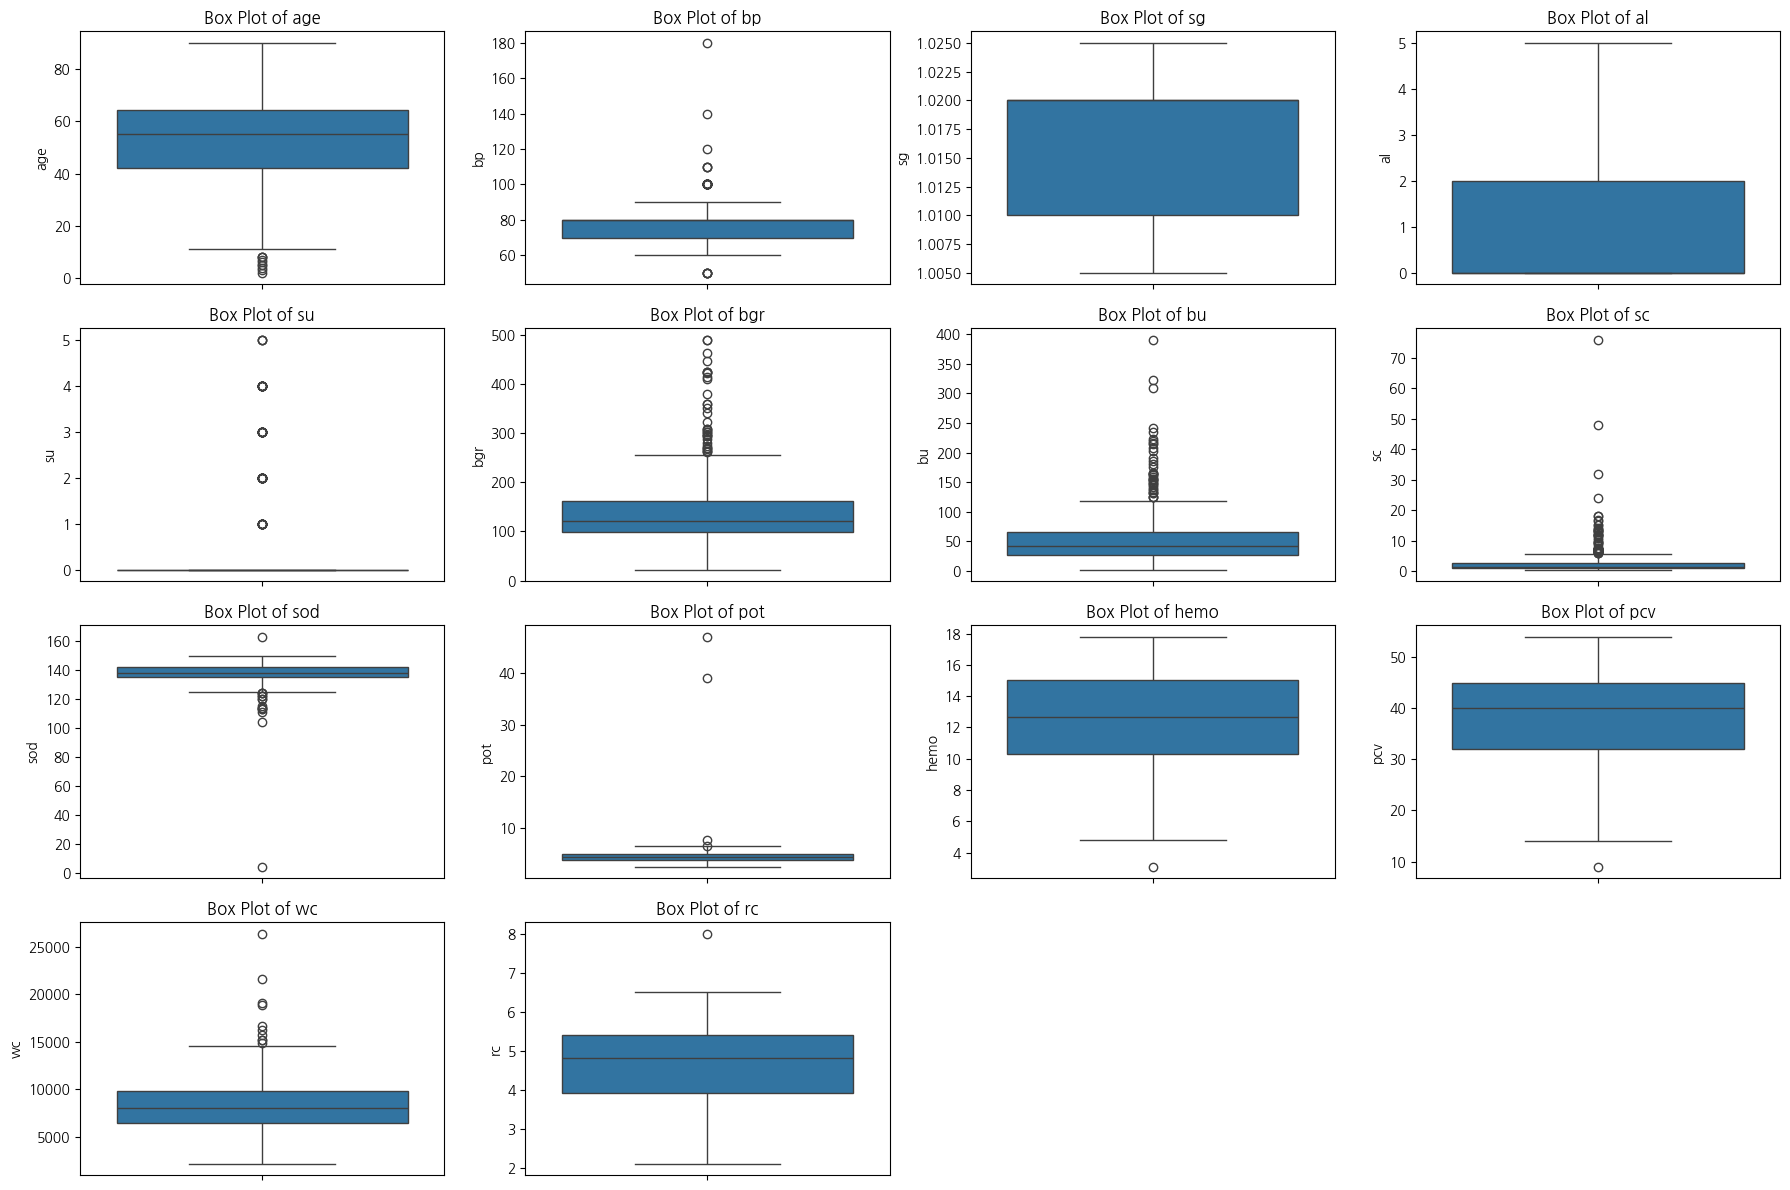

In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 설정 (5x5)
fig, axes = plt.subplots(4, 4, figsize=(18, 12))  # 전체 그래프 크기 조정
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환하여 쉽게 인덱싱

# 박스플롯 그리기
for i, col in enumerate(continuous_cols):
    sns.boxplot(y=kidneyDF[col], ax=axes[i])  # 박스플롯 추가
    axes[i].set_title(f"Box Plot of {col}")  # 제목 설정

# 빈 서브플롯 숨기기 (변수 개수가 25개보다 적을 경우 대비)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # 간격 조정
plt.show()

<pre>
나이 (age): 최대값을 100에서 120으로 설정하여 정상적인 연령 범위까지 포함.
혈압 (bp): 최대값을 180에서 200으로 설정하여 고혈압 위기 수준까지 포함.
소변 비중 (sg): 최대값을 1.025에서 1.035로 설정하여 정상 범위까지 포함.
소변 내 단백질 (al): 최대값을 5에서 10으로 설정하여 정상적인 단백뇨 수치를 반영.
소변 내 당 (su): 최대값을 5로 설정하여 당뇨병을 반영.
혈당 (bgr): 최대값을 200에서 300으로 설정하여 고혈당 범위까지 포함.
혈액 요소 (bu): 최대값을 50에서 100으로 설정하여 건강에 큰 영향을 주지 않도록.
혈청 크레아티닌 (sc): 최대값을 1.2에서 5.0으로 설정하여 신장 상태 반영.
혈청 나트륨 (sod): 최대값을 145에서 150으로 설정하여 고나트륨 상태 반영.
혈청 칼륨 (pot): 최대값을 5에서 6으로 설정하여 고칼륨 상태 반영.
혈색소 (hemo): 최대값을 18에서 20으로 설정하여 혈색소 과잉 상태 반영.
적혈구 용적율 (pcv): 최대값을 50에서 60으로 설정하여 적혈구 과잉 상태 반영.
백혈구 수치 (wc): 최대값을 11000에서 15000으로 설정하여 염증 반응을 반영.
</pre>

In [574]:
# 이상치 기준을 설정하는 함수
def remove_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)
    return df

# 각 컬럼에 대해 이상치 처리
kidneyDF = remove_outliers(kidneyDF, 'age', 0, 120)
kidneyDF = remove_outliers(kidneyDF, 'bp', 60, 200)
kidneyDF = remove_outliers(kidneyDF, 'sg', 1.010, 1.035)
kidneyDF = remove_outliers(kidneyDF, 'al', 0, 10)
kidneyDF = remove_outliers(kidneyDF, 'su', 0, 5)
kidneyDF = remove_outliers(kidneyDF, 'bgr', 70, 300)
kidneyDF = remove_outliers(kidneyDF, 'bu', 7, 100)
kidneyDF = remove_outliers(kidneyDF, 'sc', 0.4, 5.0)
kidneyDF = remove_outliers(kidneyDF, 'sod', 135, 150)
kidneyDF = remove_outliers(kidneyDF, 'pot', 3.5, 6.0)
kidneyDF = remove_outliers(kidneyDF, 'hemo', 13, 20)
kidneyDF = remove_outliers(kidneyDF, 'pcv', 40, 60)
kidneyDF = remove_outliers(kidneyDF, 'wc', 4000, 15000)
kidneyDF = remove_outliers(kidneyDF, 'rc', 4, 7)

# 결측치 확인
print(kidneyDF.isnull().sum())


age                 9
bp                 17
sg                 54
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                66
bu                 71
sc                 75
sod               152
pot               118
hemo              231
pcv               222
wc                119
rc                200
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [575]:
## 각 연속형 변수에 대해 이상치 처리
#for col in continuous_cols:
#    Q1 = kidneyDF[col].quantile(0.25)  # 25% 분위수
#    Q3 = kidneyDF[col].quantile(0.75)  # 75% 분위수
#    IQR = Q3 - Q1  # IQR 계산

#    # 이상치 기준 계산
#    lower_bound = Q1 - 2 * IQR
#    upper_bound = Q3 + 2 * IQR

#    # 이상치인 행을 필터링하여 제거
#    kidneyDF = kidneyDF[(kidneyDF[col] >= lower_bound) & (kidneyDF[col] <= upper_bound)]

## 결측치 확인
#print(kidneyDF.isnull().sum().sum())

In [576]:
kidneyDF.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,383.000000,346.000000,354.000000,351.000000,334.000000,329.000000,325.000000,248.000000,282.000000,169.000000,178.000000,281.000000,200.000000
mean,51.483376,76.814621,1.017659,1.016949,0.450142,133.598802,41.233131,1.509692,140.403226,4.409574,15.026627,45.769663,8163.345196,5.153000
std,17.169714,13.431408,0.005491,1.352679,1.099191,52.016174,20.396279,0.942894,4.388833,0.601493,1.291295,4.211604,2244.129210,0.671375
min,2.000000,60.000000,1.010000,0.000000,0.000000,70.000000,10.000000,0.400000,135.000000,3.500000,13.000000,40.000000,4100.000000,4.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,99.000000,25.000000,0.900000,137.000000,3.900000,13.900000,42.000000,6500.000000,4.600000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,118.500000,38.000000,1.200000,140.000000,4.400000,15.000000,45.000000,7900.000000,5.100000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,144.000000,50.000000,1.900000,143.000000,4.900000,16.000000,49.750000,9700.000000,5.700000
max,90.000000,180.000000,1.025000,5.000000,5.000000,298.000000,98.600000,4.600000,150.000000,5.900000,17.800000,54.000000,14900.000000,6.500000


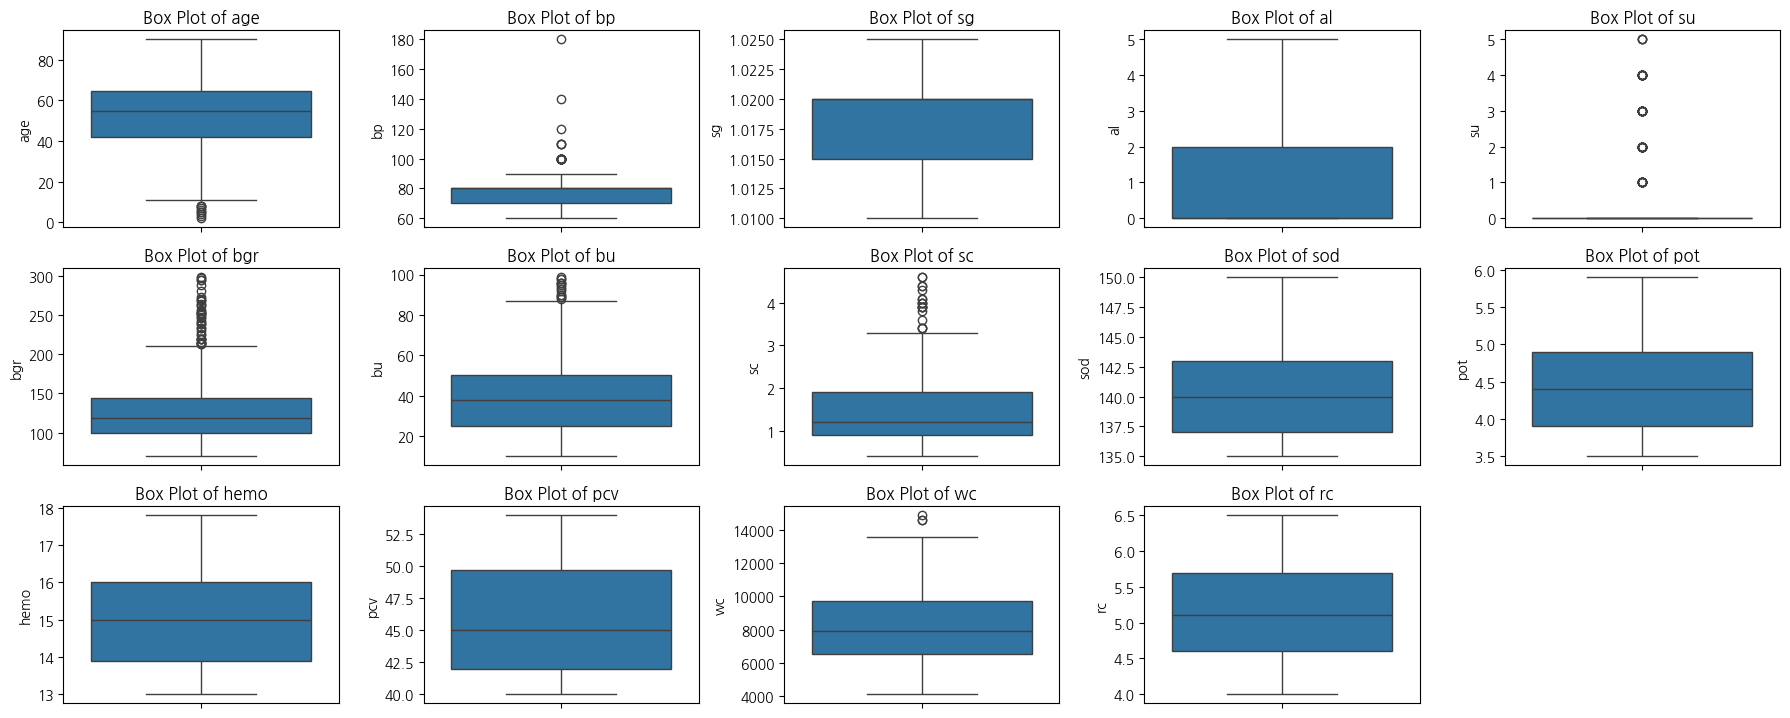

In [577]:
import matplotlib.pyplot as plt
import seaborn as sns

# 서브플롯 설정 (5x5)
fig, axes = plt.subplots(5, 5, figsize=(18, 12))  # 전체 그래프 크기 조정
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환하여 쉽게 인덱싱

# 박스플롯 그리기
for i, col in enumerate(continuous_cols):
    sns.boxplot(y=kidneyDF[col], ax=axes[i])  # 박스플롯 추가
    axes[i].set_title(f"Box Plot of {col}")  # 제목 설정

# 빈 서브플롯 숨기기 (변수 개수가 25개보다 적을 경우 대비)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # 간격 조정
plt.show()

<pre>
✅ KNNImputer의 원리
결측치가 있는 샘플을 찾음
해당 샘플과 유사한 K개의 샘플을 탐색 (유클리드 거리 사용)
선택한 K개의 샘플에서 결측치가 없는 값들의 평균을 사용하여 결측치를 채움
예: n_neighbors=5이면 가장 가까운 5개의 값의 평균을 사용
</pre>

In [578]:
# 결측치 처리
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
kidneyDF.loc[:, continuous_cols] = imputer.fit_transform(kidneyDF[continuous_cols])

kidneyDF[continuous_cols].isnull().sum().sum()

np.int64(0)

- 범주형 변수

In [579]:
kidneyDF[category_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rbc             248 non-null    object
 1   pc              335 non-null    object
 2   pcc             396 non-null    object
 3   ba              396 non-null    object
 4   htn             398 non-null    object
 5   dm              398 non-null    object
 6   cad             398 non-null    object
 7   appet           399 non-null    object
 8   pe              399 non-null    object
 9   ane             399 non-null    object
 10  classification  400 non-null    object
dtypes: object(11)
memory usage: 34.5+ KB


In [580]:
# 결측치 - 최빈값으로 채우기
for col in category_cols:
    kidneyDF[col] = kidneyDF[col].fillna(kidneyDF[col].mode()[0])

In [581]:
kidneyDF[category_cols].isnull().sum().sum()

np.int64(0)

In [582]:
kidneyDF.isnull().sum().sum()

np.int64(0)

범주형 변수 => 이진(Binary) 데이터

In [583]:
for col in category_cols:
    print(f"{col} has {kidneyDF[col].unique()} values\n")

rbc has ['normal' 'abnormal'] values

pc has ['normal' 'abnormal'] values

pcc has ['notpresent' 'present'] values

ba has ['notpresent' 'present'] values

htn has ['yes' 'no'] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes'] values

cad has ['no' 'yes' '\tno'] values

appet has ['good' 'poor'] values

pe has ['no' 'yes'] values

ane has ['no' 'yes'] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [584]:
for col in category_cols:
    kidneyDF[col] = kidneyDF[col].str.strip() 

In [585]:
for col in category_cols:
    print(f"{col} has {kidneyDF[col].unique()} values\n")

rbc has ['normal' 'abnormal'] values

pc has ['normal' 'abnormal'] values

pcc has ['notpresent' 'present'] values

ba has ['notpresent' 'present'] values

htn has ['yes' 'no'] values

dm has ['yes' 'no'] values

cad has ['no' 'yes'] values

appet has ['good' 'poor'] values

pe has ['no' 'yes'] values

ane has ['no' 'yes'] values

classification has ['ckd' 'notckd'] values



In [586]:
# 범주형 값을 0과 1로 변환
kidneyDF[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']] = \
kidneyDF[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']].replace(
    {'yes': '1', 'normal': '1', 'present': '1', 'good': '1', 'ckd': '1',
     'no':0, 'abnormal': '0', 'notpresent': '0', 'poor': '0', 'notckd': '0'}
)

# 변경된 값 확인
kidneyDF[category_cols]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,1,1,0,0,1,1,0,1,0,0,1
1,1,1,0,0,0,0,0,1,0,0,1
2,1,1,0,0,0,1,0,0,0,1,1
3,1,0,1,0,1,0,0,0,1,1,1
4,1,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,1,0,0,0
396,1,1,0,0,0,0,0,1,0,0,0
397,1,1,0,0,0,0,0,1,0,0,0
398,1,1,0,0,0,0,0,1,0,0,0


<hr>

#### 시각화

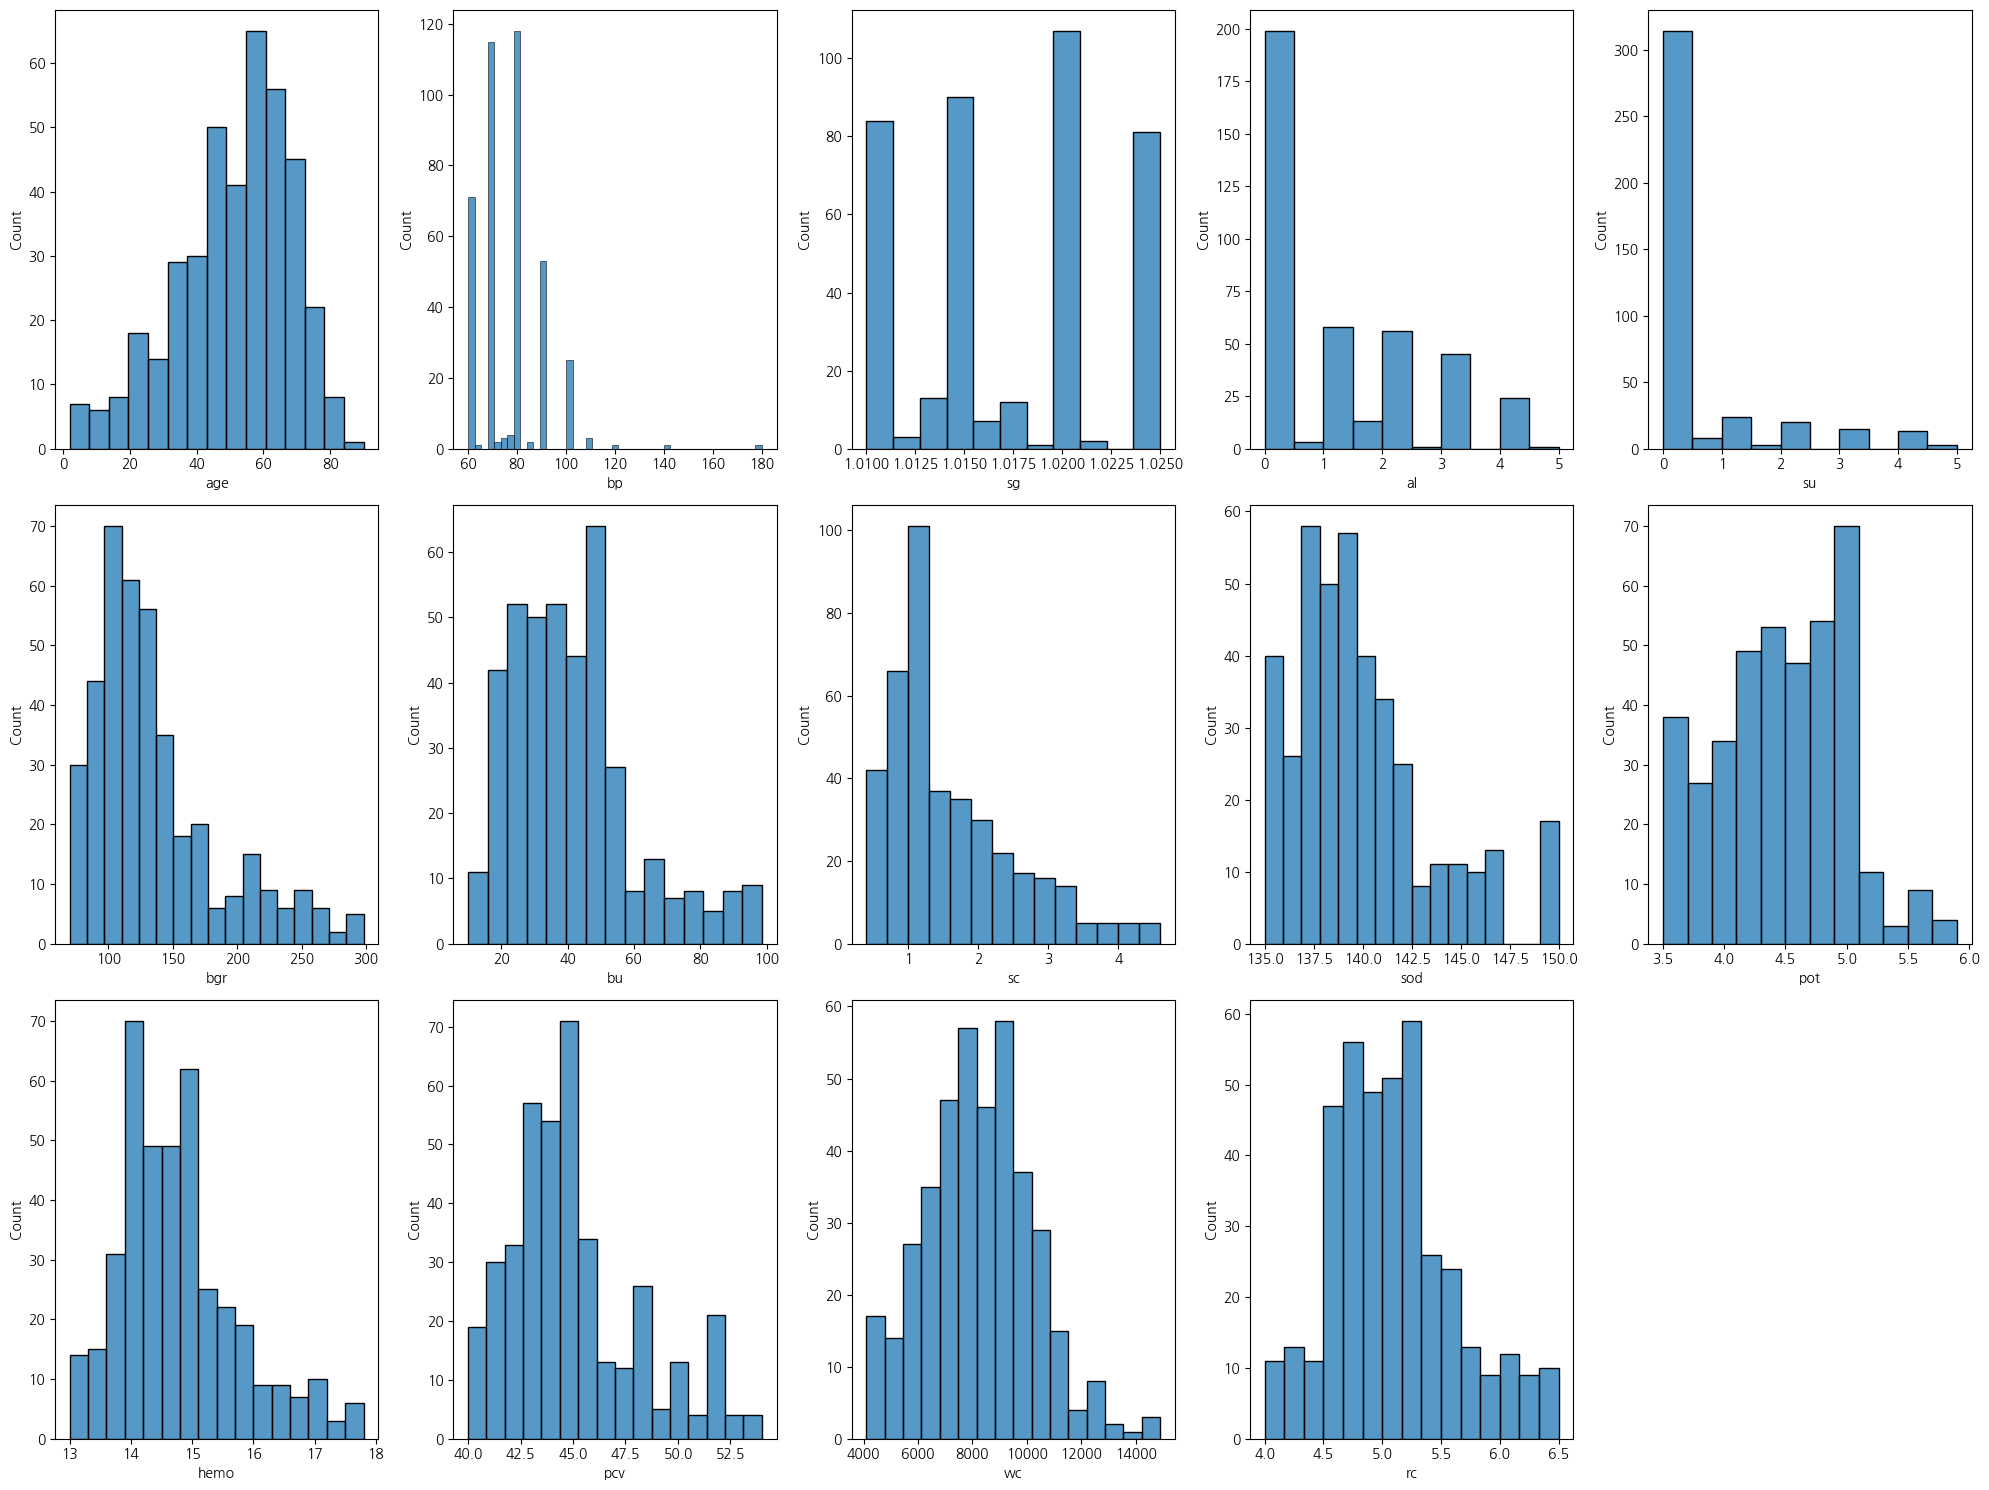

In [587]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in continuous_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(kidneyDF[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

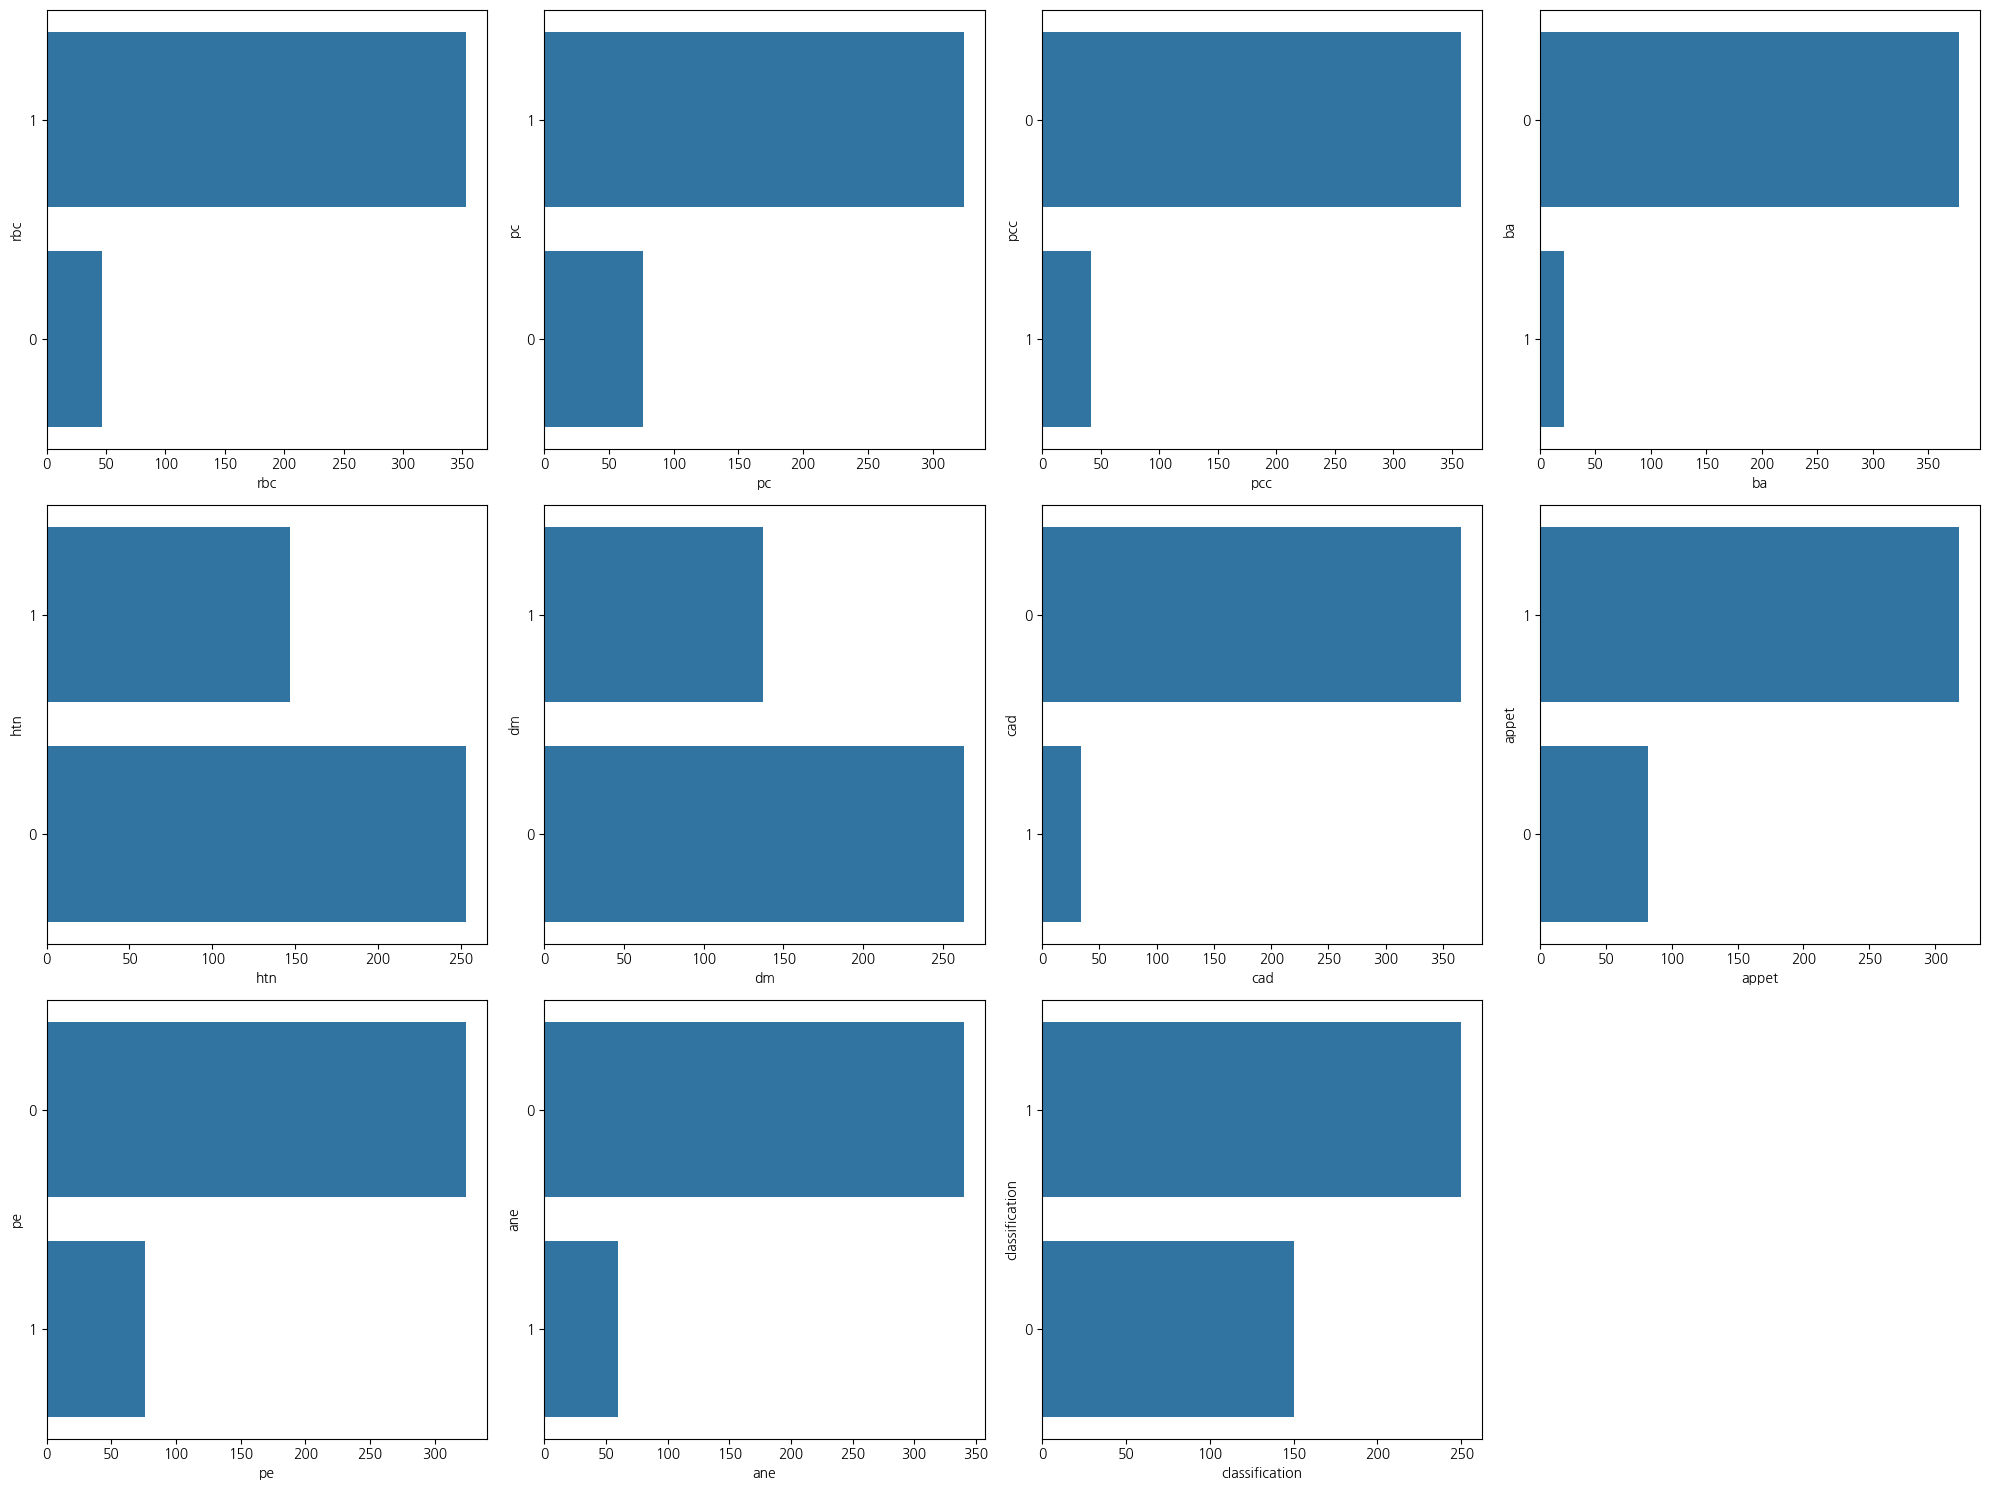

In [588]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in category_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(kidneyDF[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

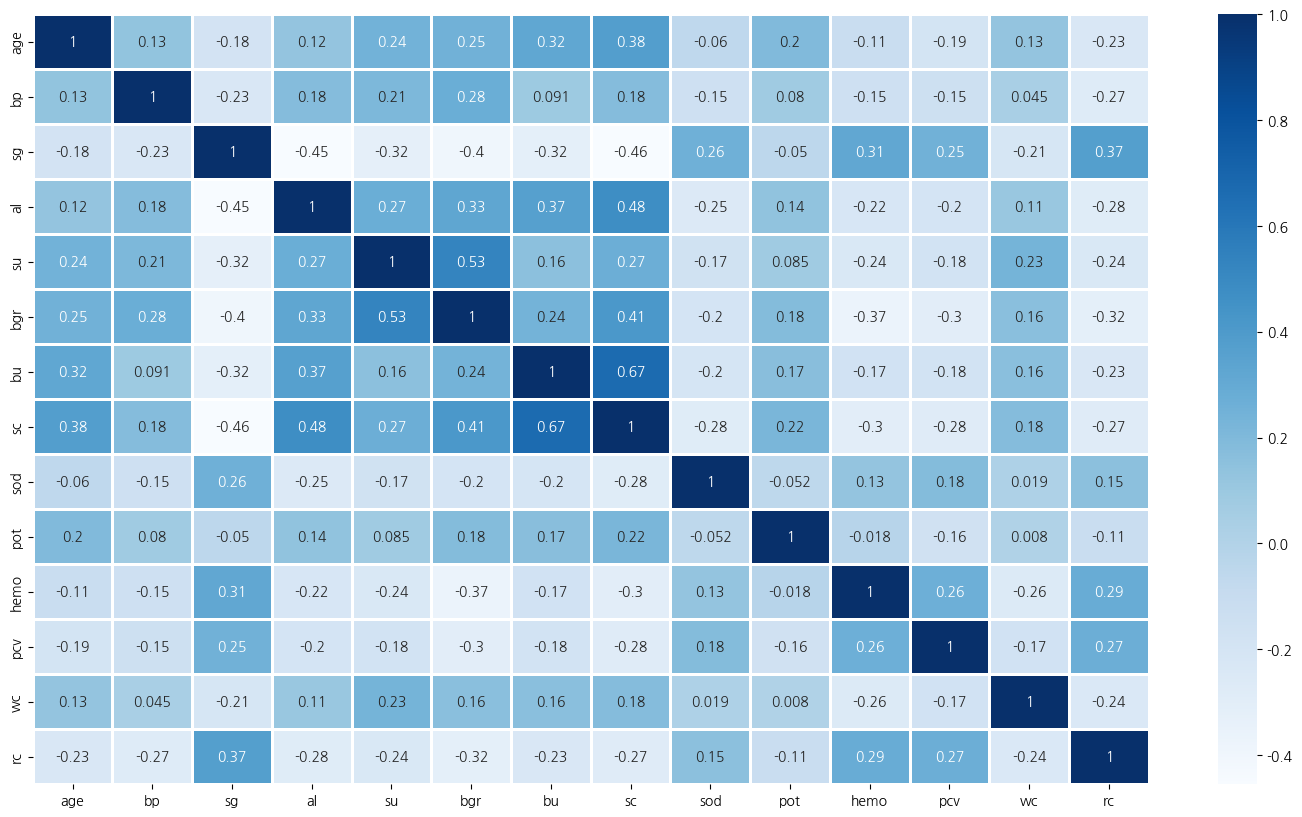

In [589]:
## 독립변수들끼리의 상관관계 확인 다중공산성
plt.figure(figsize = (18, 10))

sns.heatmap(kidneyDF[continuous_cols].corr(), annot = True, linewidths = 2, cmap="Blues")
plt.show()

#### [1] 데이터 가공 <hr>
- 피쳐/특성/독립과 타겟/클래스/종속변수 분리

In [590]:
from sklearn.model_selection import train_test_split

In [591]:
featureDF = kidneyDF.iloc[:, :-1]      # 마지막 열(타겟)을 제외한 모든 Feature 사용
targetSR = kidneyDF['classification']  # Target 그대로 사용

In [592]:
featureDF = featureDF.drop(columns=['hemo','al','sg','pcv','sc','rc'])
featureDF.head()

,age,bp,su,rbc,pc,pcc,ba,bgr,bu,sod,pot,wc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,0.0,1,1,0,0,121.0,36.0,138.0,4.44,7800.0,1,1,0,1,0,0
1,7.0,68.0,0.0,1,1,0,0,120.2,18.0,137.4,4.12,6000.0,0,0,0,1,0,0
2,62.0,80.0,3.0,1,1,0,0,186.8,53.0,138.0,4.38,7500.0,0,1,0,0,0,1
3,48.0,70.0,0.0,1,0,1,0,117.0,56.0,141.2,4.04,6700.0,1,0,0,0,1,1
4,51.0,80.0,0.0,1,1,0,0,106.0,26.0,142.2,3.98,7300.0,0,0,0,1,0,0


In [593]:
print(f'featureDF : {featureDF.shape}  targetSR : {targetSR.shape}')

featureDF : (400, 18)  targetSR : (400,)


- 훈련용/테스트용 분리

In [594]:
## - 분류 시에는 훈련용/테스트용에 동일한 비율로 타겟이 배분 
## - stratify 매개변수 : 타겟 데이터셋의 클래스/라벨 비율에 맞게 학습용/테스트용 분리 
train_X, test_X, train_y, test_y = train_test_split(featureDF, targetSR,
                                                    random_state=7,
                                                    test_size=0.2,
                                                    stratify=targetSR)

In [595]:
print(f'[TRAIN] train_X : {train_X.shape}  train_y : {train_y.shape}')
print(f'[TEST] test_X : {test_X.shape}  test_y : {test_y.shape}')

[TRAIN] train_X : (320, 18)  train_y : (320,)
[TEST] test_X : (80, 18)  test_y : (80,)


- 특성/피쳐 2개에 대한 스케일링 진행 ==> 피쳐의 값의 범위 일치

In [596]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

In [597]:
## StandardScaler : 평균 0, 표준편차 1 즉, 정규분포 따르도록 스케일링
## 훈련용 DS기반의 스케일러는 테스트용 DS, 사용자 데이터에 대해 스케일링 진행 함
scaler = StandardScaler()

scaler.fit(train_X)

StandardScaler()

In [598]:
## fit() 후에 설정되는 파라미터들 ==> 모델 파라미터 
print(scaler.var_, scaler.mean_)

[2.99419494e+02 1.86137500e+02 1.06202148e+00 9.49609375e-02
 1.63710938e-01 9.49609375e-02 5.03027344e-02 2.51021557e+03
 3.48635989e+02 1.41496234e+01 2.95528438e-01 3.95081328e+06
 2.36630859e-01 2.24599609e-01 7.98437500e-02 1.63710938e-01
 1.46396484e-01 1.36093750e-01] [5.12475000e+01 7.67500000e+01 4.78125000e-01 8.93750000e-01
 7.93750000e-01 1.06250000e-01 5.31250000e-02 1.36120625e+02
 4.18007500e+01 1.39988750e+02 4.44375000e+00 8.23131250e+03
 3.84375000e-01 3.40625000e-01 8.75000000e-02 7.93750000e-01
 1.78125000e-01 1.62500000e-01]


In [599]:
# 훈련데이터와 테스트 데이터 스케일링 진행
# ==> 훈련용 생성한 스케일러로 훈련용, 테스트용 변환 진행 
# ==> 향후 임의의 새로운 데이터 예측(predict)시에도 해당 스케일러 적용
train_scaled_X = scaler.transform(train_X)
test_scaled_X = scaler.transform(test_X)

<hr>

#### 데이터 편향(Bias) 문제 확인

In [600]:
kidneyDF.classification.value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [601]:
from imblearn.over_sampling import SMOTE

# SMOTE 인스턴스 생성 (기본적으로 소수 클래스(0) 데이터를 증가시킴)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_train과 y_train에 SMOTE 적용
train_scaled_X, train_y = smote.fit_resample(train_scaled_X, train_y)

# 결과 확인 (업샘플링 후 클래스 분포)
print(f"After SMOTE on Training Data: {train_y.value_counts()}")

After SMOTE on Training Data: classification
1    200
0    200
Name: count, dtype: int64


c:\Users\KDP19\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<hr>

#### Feature(특징) 데이터가 너무 강력한 정보(Leakage)를 포함하고 있는가?

In [602]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_scaled_X, train_y)

RandomForestClassifier()

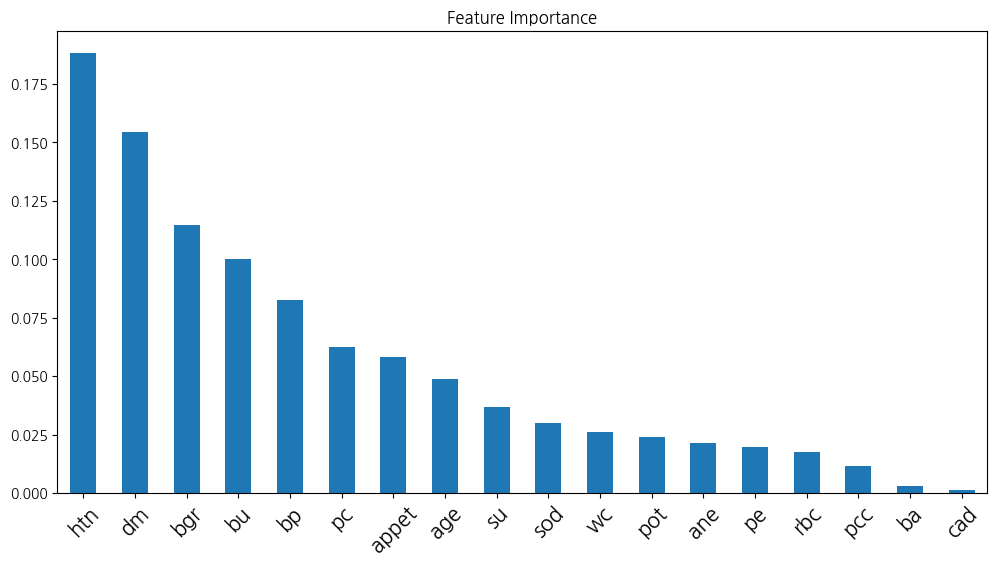

In [ ]:
feature_importance = pd.Series(rf.feature_importances_, index=featureDF.columns) # rf.feature_importances_는 훈련된 랜덤 포레스트 모델이 각 특성의 중요도를 계산한 값
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.xticks(rotation=45, fontsize=15)
plt.title("Feature Importance")
plt.show()

In [604]:
#featureDF = featureDF.drop(columns=['hemo','al','sg','pcv','sc','rc'])

In [605]:
feature_importance

age      0.048586
bp       0.082377
su       0.036674
rbc      0.017405
pc       0.062493
pcc      0.011712
ba       0.003031
bgr      0.114556
bu       0.100153
sod      0.030153
pot      0.023899
wc       0.026228
htn      0.188185
dm       0.154462
cad      0.001108
appet    0.058084
pe       0.019632
ane      0.021263
dtype: float64

<hr>

#### [2] LogisticRegression, KNeighborsClassifier

In [606]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [607]:
## Logistic Regression
lr = LogisticRegression()
lr.fit(train_scaled_X, train_y)

LogisticRegression()

In [608]:
## KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_scaled_X, train_y)

KNeighborsClassifier(n_neighbors=10)

In [609]:
## [2] 다양한 성능평가 지표 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [610]:
def model_acc(model):
    train_pre = model.predict(train_scaled_X)
    test_pre = model.predict(test_scaled_X)
    
    ## 정확도, 정밀도, 재현율, f1점수
    train_accuracy = accuracy_score(train_y, train_pre)
    train_precision = precision_score(train_y, train_pre, average="macro")
    train_recall = recall_score(train_y, train_pre, average="macro")
    train_f1 = f1_score(train_y, train_pre, average="macro")

    test_accuracy = accuracy_score(test_y, test_pre)
    test_precision = precision_score(test_y, test_pre, average="macro")
    test_recall = recall_score(test_y, test_pre, average="macro")
    test_f1 = f1_score(test_y, test_pre, average="macro")

    # 데이터 프레임에 성능 평가 지표 넣기
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Train': [train_accuracy, train_precision, train_recall, train_f1],
        'Test': [test_accuracy, test_precision, test_recall, test_f1]
        })

    return metrics_df

In [611]:
model_acc(lr)

,Metric,Train,Test
0,Accuracy,0.955000,0.950000
1,Precision,0.958716,0.941176
2,Recall,0.955000,0.960000
3,F1 Score,0.954909,0.947917


In [612]:
## [3] 손실/비용 계산 => 확률값으로 
from sklearn.metrics import log_loss
proba = lr.predict_proba(train_scaled_X)
probatest = lr.predict_proba(test_scaled_X)

train_loss = log_loss(train_y, proba)
test_loss = log_loss(test_y, probatest)

In [613]:
print(f'[Train Loss] {train_loss}  [Test Loss] {test_loss}')

[Train Loss] 0.15321612156050846  [Test Loss] 0.1613533626094094


In [614]:
model_acc(knn)

,Metric,Train,Test
0,Accuracy,0.910000,0.875000
1,Precision,0.923729,0.875000
2,Recall,0.910000,0.900000
3,F1 Score,0.909265,0.873016


In [615]:
## [3] 손실/비용 계산 => 확률값으로 
from sklearn.metrics import log_loss
proba = knn.predict_proba(train_scaled_X)
probatest = knn.predict_proba(test_scaled_X)

train_loss = log_loss(train_y, proba)
test_loss = log_loss(test_y, probatest)

In [616]:
print(f'[Train Loss] {train_loss}  [Test Loss] {test_loss}')

[Train Loss] 0.16190608125420805  [Test Loss] 0.2791299959238762


#### [LogisticRegression CV]

In [617]:
from sklearn.model_selection import cross_val_score

# 예시: 교차 검증으로 정확도 점검하기
cv_scores = cross_val_score(LogisticRegression(), train_scaled_X, train_y, cv=10, scoring='accuracy')
print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

Cross Validation Scores: [0.9   1.    0.925 1.    0.95  0.95  0.875 0.95  0.95  0.925]
Mean Accuracy: 0.9425


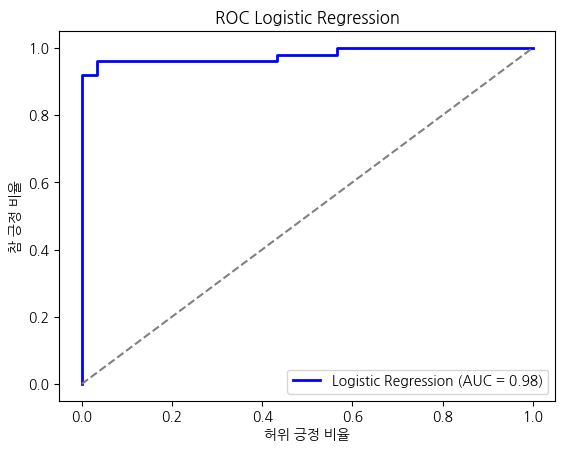

In [618]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# test_y가 문자열로 되어 있을 경우, 이를 정수형으로 변환
test_y = test_y.astype(int)

# Logistic Regression 모델로 예측 확률 계산
lr_proba = lr.predict_proba(test_scaled_X)[:, 1]

# ROC curve 계산
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, lr_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# ROC 곡선 그리기
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# 대각선 (무작위 예측)을 추가하여 모델 성능을 비교할 수 있도록 합니다.
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 그래프 레이블 추가
plt.xlabel('허위 긍정 비율')
plt.ylabel('참 긍정 비율')
plt.title('ROC Logistic Regression')

# 범례 추가
plt.legend(loc='lower right')

# 그래프 출력
plt.show()

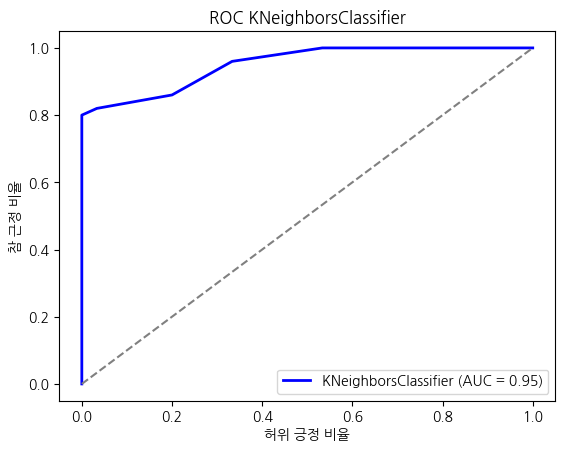

In [619]:
# KNeighborsClassifier 모델로 예측 확률 계산
knn_proba = knn.predict_proba(test_scaled_X)[:, 1]

# ROC curve 계산
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, knn_proba)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# ROC 곡선 그리기
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNeighborsClassifier (AUC = {roc_auc_knn:.2f})')

# 대각선 (무작위 예측)을 추가하여 모델 성능을 비교할 수 있도록 합니다.
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 그래프 레이블 추가
plt.xlabel('허위 긍정 비율')
plt.ylabel('참 근정 비율')
plt.title('ROC KNeighborsClassifier')

# 범례 추가
plt.legend(loc='lower right')

# 그래프 출력
plt.show()

<hr>

#### [3] DecisionTreeClassifier
- 메인학습 : 지도학습 - 분류
- 세부학습 : 의사결정학습알고리즘 

In [620]:
## 학습 진행
from sklearn.tree import DecisionTreeClassifier  # 모델 클래스
from sklearn.tree import export_graphviz         # 모델 시각화 관련

In [621]:
## DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(max_depth=3, random_state=42,min_samples_split=10) 
dtmodel.fit(train_scaled_X, train_y)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)

In [622]:
train_X.columns, train_y.unique()
## scaled는 이미 nd.array로 바뀌어서 거기엔 feature 정보 없음
## 피쳐이름 : train_X.컬럼 , 클래스네임 : train_y.유니크 => 이름 찾아야 함

(Index(['age', 'bp', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'pot',
        'wc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'],
       dtype='object'),
 array(['1', '0'], dtype=object))

In [623]:
## 학습 모델 시각화 파일 저장
export_graphviz(dtmodel, out_file='kidneyDT.dot', 
                feature_names=train_X.columns,
                class_names=train_y.unique())

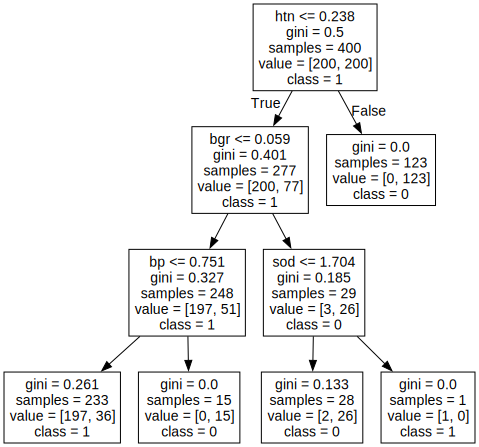

In [624]:
## 모델 파일 dot ==> 시각화
import graphviz

# 파일 열기
with open('kidneyDT.dot') as f:
    data = f.read() # 문자열로 가져옴

# 파일에서 가져온 데이터 출력 ==> 시각화
#print(data)
graphviz.Source(data)

####  [4] 성능평가 <hr>

In [625]:
# 훈련 데이터와 테스트 데이터에 대해 예측
train_pre = dtmodel.predict(train_scaled_X)
test_pre = dtmodel.predict(test_scaled_X)

# 예측된 값이 문자열로 되어 있을 수 있으므로, 이를 정수형으로 변환
train_pre = train_pre.astype(int)
test_pre = test_pre.astype(int)

# y_true 값이 정수형이어야 하므로, train_y와 test_y도 정수형으로 변환
train_y = train_y.astype(int)
test_y = test_y.astype(int)

# 모델 성능 평가
train_accuracy = accuracy_score(train_y, train_pre)
test_accuracy = accuracy_score(test_y, test_pre)

train_precision = precision_score(train_y, train_pre, average="macro")
test_precision = precision_score(test_y, test_pre, average="macro")

train_recall = recall_score(train_y, train_pre, average="macro")
test_recall = recall_score(test_y, test_pre, average="macro")

train_f1 = f1_score(train_y, train_pre, average="macro")
test_f1 = f1_score(test_y, test_pre, average="macro")

# Log loss
train_proba = dtmodel.predict_proba(train_scaled_X)
test_proba = dtmodel.predict_proba(test_scaled_X)

train_loss = log_loss(train_y, train_proba)
test_loss = log_loss(test_y, test_proba)

# Cross-validation score
cv_scores = cross_val_score(dtmodel, train_scaled_X, train_y, cv=5, scoring='accuracy')
cv_mean_accuracy = cv_scores.mean()

# 결과 출력
print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
print(f"Train Precision: {train_precision}, Test Precision: {test_precision}")
print(f"Train Recall: {train_recall}, Test Recall: {test_recall}")
print(f"Train F1 Score: {train_f1}, Test F1 Score: {test_f1}")
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")
print(f"Cross Validation Mean Accuracy: {cv_mean_accuracy}")


Train Accuracy: 0.905, Test Accuracy: 0.85
Train Precision: 0.9170528266913809, Test Precision: 0.85
Train Recall: 0.905, Test Recall: 0.8733333333333333
Train F1 Score: 0.9043086298506711, Test F1 Score: 0.8476190476190477
Train Loss: 0.26874766317557963, Test Loss: 0.3626547831727849
Cross Validation Mean Accuracy: 0.8875


In [626]:
import pandas as pd

# 모델 성능 평가 결과를 데이터프레임으로 저장
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss'],
    'Train': [
        train_accuracy, 
        train_precision, 
        train_recall, 
        train_f1, 
        train_loss, 
    ],
    'Test': [
        test_accuracy, 
        test_precision, 
        test_recall, 
        test_f1, 
        test_loss, 
    ]
})

metrics_df

,Metric,Train,Test
0,Accuracy,0.905000,0.850000
1,Precision,0.917053,0.850000
2,Recall,0.905000,0.873333
3,F1 Score,0.904309,0.847619
4,Log Loss,0.268748,0.362655


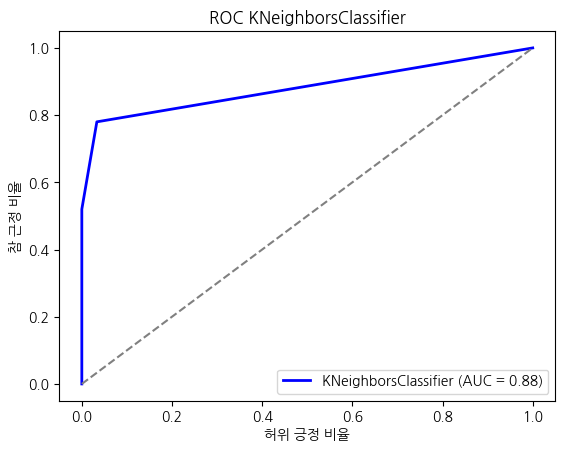

In [627]:
# KNeighborsClassifier 모델로 예측 확률 계산
dtmodel_proba = dtmodel.predict_proba(test_scaled_X)[:, 1]

# ROC curve 계산
fpr_dtmodel, tpr_dtmodel, thresholds_dtmodel = roc_curve(test_y, dtmodel_proba)
roc_auc_dtmodel = auc(fpr_dtmodel, tpr_dtmodel)

# ROC 곡선 그리기
plt.plot(fpr_dtmodel, tpr_dtmodel, color='blue', lw=2, label=f'KNeighborsClassifier (AUC = {roc_auc_dtmodel:.2f})')

# 대각선 (무작위 예측)을 추가하여 모델 성능을 비교할 수 있도록 합니다.
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# 그래프 레이블 추가
plt.xlabel('허위 긍정 비율')
plt.ylabel('참 근정 비율')
plt.title('ROC KNeighborsClassifier')

# 범례 추가
plt.legend(loc='lower right')

# 그래프 출력
plt.show()

In [628]:
def predict_kidney_disease(age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane):
    # 학습에 사용된 특징들 (train_X.columns와 동일)
    model_features = list(train_X.columns)

    # 입력 데이터를 DataFrame으로 변환
    input_data = {
        'age': [age],
        'bp': [bp],
        'sg': [sg],
        'al': [al],
        'su': [su],
        'rbc': [1 if rbc == 'normal' else 0],  # 'normal'일 경우 1, 'abnormal'일 경우 0
        'pc': [1 if pc == 'normal' else 0],  # 'normal'일 경우 1, 'abnormal'일 경우 0
        'pcc': [1 if pcc == 'present' else 0],  # 'present'일 경우 1, 'notpresent'일 경우 0
        'ba': [1 if ba == 'present' else 0],  # 'present'일 경우 1, 'notpresent'일 경우 0
        'bgr': [bgr],
        'bu': [bu],
        'sc': [sc],
        'sod': [sod],
        'pot': [pot],
        'hemo': [hemo],
        'pcv': [pcv],
        'wc': [wc],
        'rc': [rc],
        'htn': [htn],
        'dm': [dm],
        'cad': [cad],
        'appet': [1 if appet == 'good' else 0],  # 'good'일 경우 1, 'poor'일 경우 0
        'pe': [1 if pe == 'yes' else 0],  # 'yes'일 경우 1, 'no'일 경우 0
        'ane': [1 if ane == 'yes' else 0]  # 'yes'일 경우 1, 'no'일 경우 0
    }

    # 입력 데이터를 DataFrame으로 변환
    input_df = pd.DataFrame(input_data)

    # 모델 학습에 사용된 특성과 일치시키기 위해 컬럼이 빠지면 추가
    missing_cols = set(model_features) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0

    # 특성 순서 맞추기
    input_df = input_df[model_features]

    # 예측 수행
    prediction = lr.predict(input_df)[0]
    probability = lr.predict_proba(input_df)[0][1]  # 확률값

    # 예측 결과에 따른 메시지 출력
    if prediction == 1:
        print(f"⚠️ [경고] 신장 질환 발생 가능성이 있습니다. (확률: {probability:.2f})")
    else:
        print(f"✅ 신장 질환 위험이 낮습니다. (확률: {probability:.2f})")


In [629]:
predict_kidney_disease(
    age=60, 
    bp=130, 
    sg=1.020, 
    al=1, 
    su=0, 
    rbc='normal', 
    pc='normal', 
    pcc='notpresent', 
    ba='present', 
    bgr=150, 
    bu=30, 
    sc=1.0, 
    sod=140, 
    pot=4.5, 
    hemo=15, 
    pcv=45, 
    wc=8000, 
    rc=5.0, 
    htn=1, 
    dm=0, 
    cad=0, 
    appet='good', 
    pe='no', 
    ane='no'
)

✅ 신장 질환 위험이 낮습니다. (확률: 1.00)


c:\Users\KDP19\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\KDP19\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [630]:
# 예측
y_new_pred = lr.predict(train_scaled_X)

# 예측 확률
y_new_pred_proba = lr.predict_proba(train_scaled_X)[:, 1]

# 결과 출력
print(f"예측 클래스: {y_new_pred[0]}")
print(f"양성(1) 클래스 확률: {y_new_pred_proba[0]:.4f}")
print(f"음성(0) 클래스 확률: {1 - y_new_pred_proba[0]:.4f}")


예측 클래스: 1
양성(1) 클래스 확률: 1.0000
음성(0) 클래스 확률: 0.0000
